In [1]:
# Dependencies
from bs4 import BeautifulSoup
import requests
import pymongo
import pandas as pd
import csv
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.58M/6.58M [00:00<00:00, 10.7MB/s]


In [3]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
#Retrieve/visit URL
browser.visit(url)

In [4]:
#Set an HTML object
html = browser.html

#Parse HTML with Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

#Inspected table element
result = soup.find('table', class_='table')

In [5]:
for query in result:
    print(query)



<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>74

In [6]:
headers = []
data = []

#Scrape headers
for tr in result.find_all("tr"):
    header=([th.text for th in tr.find_all('th')])
    headers.append(header)

#Scrape rows
for tr in result.find_all("tr"):
    row=([td.text for td in tr.find_all('td')])
    data.append(row)


In [7]:
#Removes everything but the first header
headers = headers[0:1]
print(headers)

[['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']]


In [8]:
#Bye
browser.quit()

In [9]:
mars_temp_df = pd.DataFrame(data, columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])
mars_temp_df

#print('Hold onto your butts...')

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
#Drops rows with null values
mars_temp_df = mars_temp_df.dropna(axis=0,how='all')

In [11]:
#Sanity check
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [12]:
#Type check
dtypes = mars_temp_df.dtypes
print(dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [13]:
#Alter header datatypes to match what we want.
#Temperatures and pressure will be float; months in int; date is datetime64; id is int
mars_temp_df = mars_temp_df.astype({'id':int})
mars_temp_df = mars_temp_df.astype({'terrestrial_date':'datetime64'})
mars_temp_df = mars_temp_df.astype({'sol':int})
mars_temp_df = mars_temp_df.astype({'ls':int})
mars_temp_df = mars_temp_df.astype({'month':int})
mars_temp_df = mars_temp_df.astype({'min_temp':float})
mars_temp_df = mars_temp_df.astype({'pressure':float})

In [14]:
#Sanity check
dtypes = mars_temp_df.dtypes
print(dtypes)

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [15]:
#Another sanity check
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1863,1889,2018-02-23,1973,133,5,-78.0,730.0
1864,1892,2018-02-24,1974,134,5,-77.0,729.0
1865,1894,2018-02-25,1975,134,5,-76.0,729.0
1866,1893,2018-02-26,1976,135,5,-77.0,728.0


In [16]:
mars_month_count = len(mars_temp_df["month"].unique())
mars_day_count = len(mars_temp_df["sol"].unique())
mars_temp_avg_min = mars_temp_df.groupby(['month'])['min_temp'].mean()
mars_pressure_avg = mars_temp_df.groupby(['month'])['pressure'].mean()

In [17]:
temps = mars_temp_df.groupby("month").mean()
temps

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [18]:
print(f'There are {mars_month_count} months on Mars.')
print(f'There are {mars_day_count} Martian days where data was collected')

There are 12 months on Mars.
There are 1867 Martian days where data was collected


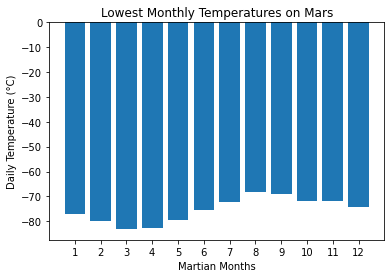

In [19]:
#arranging months in sequential order
month = np.arange(1, 13, 1)
#x is set to the months on Mars
#y is set to the temperatures on Mars
x = month
y = temps["min_temp"]
plt.bar(x, y)
plt.xticks(month)
plt.xlabel("Martian Months")
plt.ylabel("Daily Temperature (°C)")
plt.title("Lowest Monthly Temperatures on Mars")
plt.show()

In [20]:
print(f'Based on the graph, the 3rd Martian month is the coldest. The 8th month is the warmest.')
print(f'Bring a jacket!')

Based on the graph, the 3rd Martian month is the coldest. The 8th month is the warmest.
Bring a jacket!


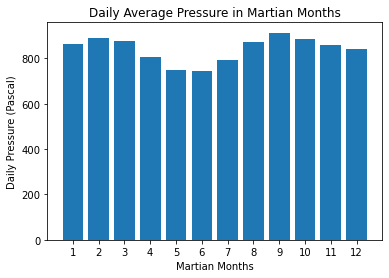

In [21]:
#x axis is set to the months on Mars
#y axis is set to the pressure values on Mars
x = month
y = temps["pressure"]
plt.bar(x, y)
plt.xticks(month)
plt.xlabel("Martian Months")
plt.ylabel("Daily Pressure (Pascal)")
plt.title('Daily Average Pressure in Martian Months')
plt.show()


In [22]:
print(f'Based on the graph, the 6th Martian month has the least pressure. The 9th month has the most pressure.')
print(f'Bring a spare air tank!')

Based on the graph, the 6th Martian month has the least pressure. The 9th month has the most pressure.
Bring a spare air tank!


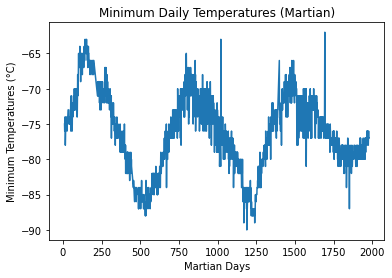

In [26]:
#x axis is set to Martian days
#y axis is set to minimum temperatures
x = mars_temp_df['sol']
y = mars_temp_df['min_temp']
plt.plot(x,y)
plt.ylabel("Minimum Temperatures (°C)")
plt.xlabel("Martian Days")
plt.title("Minimum Daily Temperatures (Martian)")
plt.show()

In [27]:
martian_year_conversion = round(750/365, 2)
print(f'The peaks are approximately 750 days apart. One Martian year is approximately {martian_year_conversion} Earth years.')

The peaks are approximately 750 days apart. One Martian year is approximately 2.05 Earth years.


In [25]:
# Confirm output file and export data into a csv
output_csv = 'mars_data.csv'

mars_temp_df.to_csv(output_csv, header=True, index=False)